$$
\frac{dx}{dt}=-\gamma x
$$

$$
\Delta x=-\gamma x{\Delta t}
$$

In [1]:
import numpy as np
import matplotlib.pylab as plt

$$
\frac{dx}{dt}=f(x,t)
$$

In [2]:
def Rk4_t(x,t,dt,gamma):
    
    k1=dt*f(x,t,gamma)
    k2=dt*f(x+k1/2,t+dt/2,gamma)
    k3=dt*f(x+k2/2,t+dt/2,gamma)
    k4=dt*f(x+k3,t+dt,gamma)
    
    x=x+(k1+2*k2+2*k3+k4)/6.
    t=t+dt
    
    return x,t
def f(x,t,gamma):
    return -gamma*x


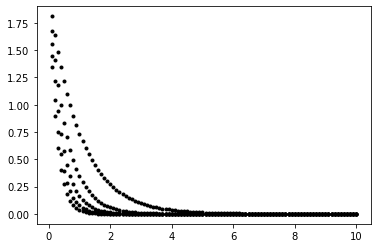

In [3]:

dt=0.1
gamma=1
for gamma in np.linspace(1,4,5):
    t=0
    x=2
    for i in range(100):
        x,t=Rk4_t(x,t,dt,gamma)
        plt.plot(t,x,'.k')
plt.show()



\begin{equation}
r^{2} \frac{d^{2} R}{d r^{2}}+r \frac{d R}{d r}+\lambda^{2} r^{2} R(r)=0
\end{equation}

----
\begin{equation}
 \frac{dv}{d r}=-r^{-1} v-\lambda^{2} R(r)
\end{equation}


\begin{equation}
\frac{dR}{d r}=v
\end{equation}

In [4]:
def dRdr(R,v,r,lambd):
    return v
def dvdr(R,v,r,lambd):
    if r==0:
        return 0
    return ((-v/r)-lambd**2*R)

In [5]:
def Rk4(R,v,r,dr,lambd):
    
    k1=dr*dRdr(R,v,r,lambd)
    l1=dr*dvdr(R,v,r,lambd)
    
    k2=dr*dRdr(R+k1/2,v+l1/2,r+dr/2,lambd)
    l2=dr*dvdr(R+k1/2,v+l1/2,r+dr/2,lambd)
    
    k3=dr*dRdr(R+k2/2,v+l2/2,r+dr/2,lambd)
    l3=dr*dvdr(R+k2/2,v+l2/2,r+dr/2,lambd)
    
    k4=dr*dRdr(R+k3  ,v+l3,r+dr,lambd)
    l4=dr*dvdr(R+k3  ,v+l3,r+dr,lambd)
    
    R=R+(k1+2*k2+2*k3+k4)/6.
    v=v+(l1+2*l2+2*l3+l4)/6.
    
    r=r+dr
    
    return R,v,r

def final_point(lambd):
    R=1.
    v=0.
    r=0.
    dr=0.05
    for i in range(100):
        R,v,r=Rk4(R,v,r,dr,lambd)
    return R

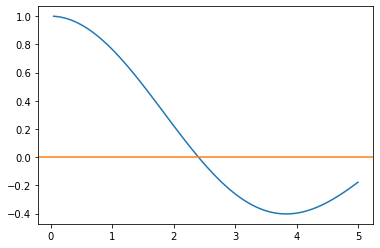

In [6]:
R=1.
v=0.
r=0.
lambda_sol=1.
dr=0.05
r_sol=np.array([])
R_sol=np.array([])
v_sol=np.array([])
for i in range(100):
    R,v,r=Rk4(R,v,r,dr,lambda_sol)
    r_sol=np.append(r_sol,r)
    R_sol=np.append(R_sol,R)
    v_sol=np.append(v_sol,v)

plt.plot(r_sol,R_sol)
plt.axhline(0,color='C1')
plt.show()


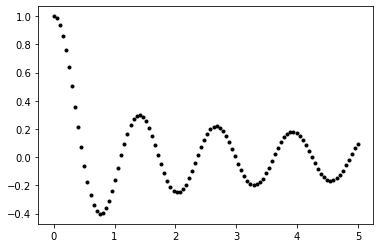

In [7]:
for l in np.linspace(0,5,100):
    plt.plot(l,final_point(l),'.k')
plt.show()  

In [14]:
def zero(a,b,f):
    fa=f(a)
    tol=1e-10
    while(b-a>tol):
        mid=(a+b)/2
        fmid=f(mid)
        if (fa*fmid)>0:
            a=mid
        else:
            b=mid        
    return mid

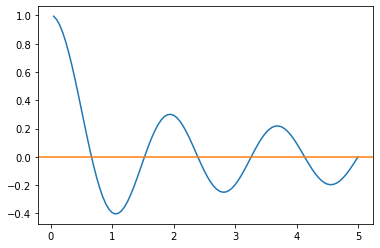

In [15]:
R=1.
v=0.
r=0.
lambda_sol=zero(3.5,4,final_point)
dr=0.05
r_sol=np.array([])
R_sol=np.array([])
v_sol=np.array([])
for i in range(100):
    R,v,r=Rk4(R,v,r,dr,lambda_sol)
    r_sol=np.append(r_sol,r)
    R_sol=np.append(R_sol,R)
    v_sol=np.append(v_sol,v)

plt.plot(r_sol,R_sol)
plt.axhline(0,color='C1')
plt.show()

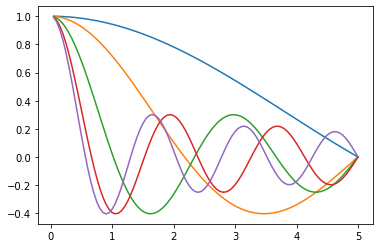

In [20]:
for limit in range(5):
    R=1.
    v=0.
    r=0.
    lambda_sol=zero(limit,limit+0.8,final_point)
    dr=0.05
    r_sol=np.array([])
    R_sol=np.array([])
    v_sol=np.array([])
    for i in range(100):
        R,v,r=Rk4(R,v,r,dr,lambda_sol)
        r_sol=np.append(r_sol,r)
        R_sol=np.append(R_sol,R)
        v_sol=np.append(v_sol,v)

    plt.plot(r_sol,R_sol)
plt.show()